<a href="https://colab.research.google.com/github/freddyambia/Data-Science-I/blob/master/TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de bibliotecas para el uso de funciones especiales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.metrics import confusion_matrix

Carga de base de datos

In [3]:
df_1=pd.read_csv("AB_NYC_2019.csv", sep=",")

Revisaremos la data cargada a partir de los descriptivos

In [4]:
df_1.shape

(29203, 16)

In [5]:
df_1.size

467248

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29203 non-null  int64  
 1   name                            29187 non-null  object 
 2   host_id                         29202 non-null  float64
 3   host_name                       29184 non-null  object 
 4   neighbourhood_group             29202 non-null  object 
 5   neighbourhood                   29202 non-null  object 
 6   latitude                        29202 non-null  float64
 7   longitude                       29202 non-null  float64
 8   room_type                       29202 non-null  object 
 9   price                           29202 non-null  float64
 10  minimum_nights                  29202 non-null  float64
 11  number_of_reviews               29202 non-null  float64
 12  last_review                     

In [7]:
df_1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


Para poder entender la información vamos a cambiar los títulos de la tabla


In [8]:
df_1.rename(columns={'host_id':'ID','minimum_nights':'noches_minimas' ,'room_type':'servicio','number_of_reviews':'calificaciones'}, inplace=True)
df_1.rename(columns={'name':'nombre','availability_365':'Disponibilidad','neighbourhood_group':'distrito','neighbourhood':'barrio'}, inplace=True)
df_1.rename(columns={'reviews_per_month':'calificaciones_por_mes', 'calculated_host_listings_count':'cantidad_servicios','price':'precio'}, inplace=True)
df_1.head(5)

,id,nombre,ID,host_name,distrito,barrio,latitude,longitude,servicio,precio,noches_minimas,calificaciones,last_review,calificaciones_por_mes,cantidad_servicios,Disponibilidad
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


De esta forma, encontramos información no relevante que se procederá a retirar: las variables son las siguientes

In [9]:
df_1.drop(['latitude','longitude','last_review'], axis=1, inplace=True)
df_1.head(5)

,id,nombre,ID,host_name,distrito,barrio,servicio,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,Private room,150.0,3.0,0.0,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


Ahora revisaremos el tipo de datos de cada columna

In [10]:
df_1.dtypes

id                          int64
nombre                     object
ID                        float64
host_name                  object
distrito                   object
barrio                     object
servicio                   object
precio                    float64
noches_minimas            float64
calificaciones            float64
calificaciones_por_mes    float64
cantidad_servicios        float64
Disponibilidad            float64
dtype: object

*Como vemos, es necesario hacer los siguientes ajustes para el análisis de datos:

*   id : string
*   nombre : string
*   ID : string
*   distrito: string
*   barrio : string
*   servicio: string
*   Disponibilidad: boolean  ( Disponibilidad todo el año)*











In [11]:
df_1[['ID', 'nombre','distrito','barrio','servicio']].astype(str)

,ID,nombre,distrito,barrio,servicio
0,2787.0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room
1,2845.0,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt
2,4632.0,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room
3,4869.0,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt
4,7192.0,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt
...,...,...,...,...,...
29198,100032033.0,Cosy room in bushwick,Brooklyn,Bushwick,Private room
29199,3532263.0,Park Slope 15 min to MANHATTAN SLEEPS 10 + INFANT,Brooklyn,Gowanus,Entire home/apt
29200,9470468.0,Premier Garden Suite near Columbia University,Manhattan,Harlem,Entire home/apt
29201,164048400.0,Great little spot,Brooklyn,Bushwick,Private room


In [12]:
df_1['Dispo']=0
df_1.head()

,id,nombre,ID,host_name,distrito,barrio,servicio,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad,Dispo
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,Private room,149.0,1.0,9.0,0.21,6.0,365.0,0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,Private room,150.0,3.0,0.0,NaN,1.0,365.0,0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0,0


In [13]:
df_1.loc[df_1.Disponibilidad>364,'Dispo']='TRUE'
df_1.loc[df_1.Disponibilidad<365,'Dispo']='FALSE'

df_1.head()

,id,nombre,ID,host_name,distrito,barrio,servicio,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad,Dispo
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,Private room,149.0,1.0,9.0,0.21,6.0,365.0,TRUE
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0,FALSE
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,Private room,150.0,3.0,0.0,NaN,1.0,365.0,TRUE
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0,FALSE
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0,FALSE


In [14]:
df_1.dtypes

id                          int64
nombre                     object
ID                        float64
host_name                  object
distrito                   object
barrio                     object
servicio                   object
precio                    float64
noches_minimas            float64
calificaciones            float64
calificaciones_por_mes    float64
cantidad_servicios        float64
Disponibilidad            float64
Dispo                      object
dtype: object

In [15]:
df_1[['Dispo']].astype(bool)

,Dispo
0,True
1,True
2,True
3,True
4,True
...,...
29198,True
29199,True
29200,True
29201,True


In [16]:
df_1.head(10)

,id,nombre,ID,host_name,distrito,barrio,servicio,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad,Dispo
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,Private room,149.0,1.0,9.0,0.21,6.0,365.0,TRUE
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0,FALSE
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,Private room,150.0,3.0,0.0,NaN,1.0,365.0,TRUE
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0,FALSE
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0,FALSE
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0,FALSE
6,5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60.0,45.0,49.0,0.40,1.0,0.0,FALSE
7,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,Private room,79.0,2.0,430.0,3.47,1.0,220.0,FALSE
8,5203,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,Private room,79.0,2.0,118.0,0.99,1.0,0.0,FALSE
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,Entire home/apt,150.0,1.0,160.0,1.33,4.0,188.0,FALSE


Ahora eliminamos los datos nulos

In [17]:
df_1.isnull()

,id,nombre,ID,host_name,distrito,barrio,servicio,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad,Dispo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29198,False,False,False,False,False,False,False,False,False,False,True,False,False,False
29199,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29200,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29201,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df_2 = df_1.dropna()


In [19]:
df_2.shape

(24352, 14)

Ahora buscaremos entender cada variable a partir del análisis descriptivo

In [20]:
df_2.describe()

,id,ID,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad
count,2.435200e+04,2.435200e+04,24352.000000,24352.000000,24352.000000,24352.000000,24352.000000,24352.000000
mean,1.129439e+07,3.420419e+07,141.791105,6.626150,38.934215,1.019147,3.212139,109.272996
std,7.013980e+06,4.073227e+07,207.884017,20.367615,57.178517,1.388796,10.312616,130.838697
min,2.539000e+03,2.571000e+03,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,4.868466e+06,4.409999e+06,70.000000,2.000000,4.000000,0.117500,1.000000,0.000000
50%,1.150342e+07,1.728985e+07,105.000000,3.000000,13.000000,0.400000,1.000000,34.000000
75%,1.768041e+07,4.815395e+07,165.000000,5.000000,52.000000,1.430000,2.000000,228.000000
max,2.240968e+07,1.640484e+08,10000.000000,1250.000000,629.000000,19.750000,232.000000,365.000000




1.   El promedio del precio de cada servicio es de 142.33, sin embargo la STD es de 196, la variación de precios va de 0 a 10000
2.   El promedio de calificaciones es de 29, con una STD de 48. Mucha variación
3.   La cantidad de servicios es de 5 y la STD de 26. Pocos servicios por ID
4.   el 75% de ID's tienen 2 calificaciones por mes y la máxima es de 58.5









Los siguientes datos deben ser retirados de la data:


1.   Disponibilidad = 0 
2.   Precio = 0 

Más adelante evaluaremos los precios demasiado altos también, outliers.



In [21]:
df_3 = df_2.loc[(df_2["precio"] > 0)]

In [22]:
df_3.head()

,id,nombre,ID,host_name,distrito,barrio,servicio,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad,Dispo
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,Private room,149.0,1.0,9.0,0.21,6.0,365.0,TRUE
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0,FALSE
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0,FALSE
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0,FALSE
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0,FALSE


In [23]:
df_3.shape

(24342, 14)

In [24]:
df_3.describe()

,id,ID,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad
count,2.434200e+04,2.434200e+04,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000
mean,1.129059e+07,3.419231e+07,141.849355,6.625668,38.934722,1.018852,3.211568,109.263249
std,7.012906e+06,4.072578e+07,207.906844,20.370526,57.184526,1.388508,10.314635,130.847475
min,2.539000e+03,2.571000e+03,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,4.867597e+06,4.405650e+06,70.000000,2.000000,4.000000,0.112500,1.000000,0.000000
50%,1.149600e+07,1.728822e+07,105.000000,3.000000,13.000000,0.400000,1.000000,34.000000
75%,1.766886e+07,4.814634e+07,165.000000,5.000000,52.000000,1.430000,2.000000,228.000000
max,2.240968e+07,1.640484e+08,10000.000000,1250.000000,629.000000,19.750000,232.000000,365.000000


In [25]:
df_4 = df_3.loc[(df_3["Disponibilidad"] > 0)]
df_4.describe()

,id,ID,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad
count,1.459200e+04,1.459200e+04,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000,14592.000000
mean,1.090817e+07,3.592571e+07,150.058114,8.084156,56.965118,1.475034,4.485060,182.270148
std,7.286828e+06,4.323602e+07,204.067899,24.609561,65.001232,1.552815,13.010039,123.506313
min,2.539000e+03,2.571000e+03,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,4.016124e+06,4.029146e+06,72.000000,2.000000,10.000000,0.300000,1.000000,64.000000
50%,1.116358e+07,1.670973e+07,110.000000,3.000000,34.000000,0.930000,1.000000,182.000000
75%,1.755465e+07,5.127879e+07,175.000000,5.000000,82.000000,2.260000,3.000000,302.000000
max,2.240945e+07,1.638779e+08,9999.000000,1250.000000,629.000000,19.750000,232.000000,365.000000


In [26]:
df_4.shape

(14592, 14)

AHORA QUE YA TENEMOS LA DATA LIMPIA DF_4  PROCEDEREMOS A REALIZAR LOS GRÁFICOS PARA COMPROBAR LO ANALIZADO NUMÉRICAMENTE

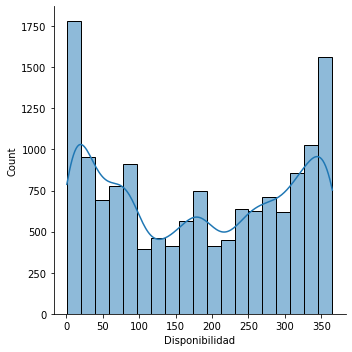

In [27]:
sns.displot(data=df_4, x="Disponibilidad", kde=True)

La variable Disponibilidad está ok 

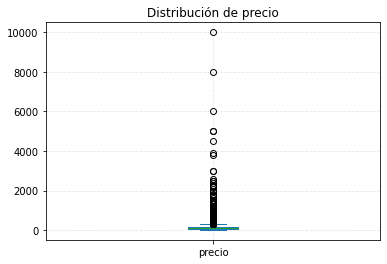

In [28]:

df_4['precio'].plot.box(title="Distribución de precio")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

Existen muchos valores de precio demasiado elevados, debemos limpiar aun esa parte de la data.

In [29]:
df_5 = df_4.loc[(df_4["precio"] < 300)]
df_5.describe()

,id,ID,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad
count,1.354700e+04,1.354700e+04,13547.000000,13547.000000,13547.000000,13547.000000,13547.000000,13547.00000
mean,1.091889e+07,3.616129e+07,118.434192,8.137816,58.435521,1.513215,4.540341,180.33978
std,7.289486e+06,4.338408e+07,61.296234,24.936378,65.903560,1.575835,13.017027,123.16745
min,2.539000e+03,2.571000e+03,10.000000,1.000000,1.000000,0.010000,1.000000,1.00000
25%,4.033433e+06,4.063640e+06,70.000000,2.000000,10.000000,0.310000,1.000000,63.00000
50%,1.116588e+07,1.694758e+07,100.000000,3.000000,35.000000,0.970000,1.000000,179.00000
75%,1.760144e+07,5.150184e+07,153.000000,5.000000,85.000000,2.310000,3.000000,300.00000
max,2.240945e+07,1.638779e+08,299.000000,1250.000000,629.000000,19.750000,232.000000,365.00000


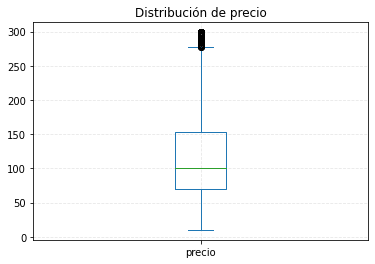

In [30]:
df_5['precio'].plot.box(title="Distribución de precio")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [31]:
df_5.shape

(13547, 14)

Tenemos una información mas adecuada ahora

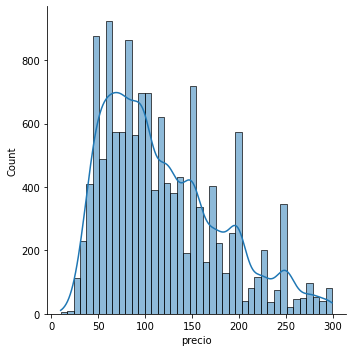

In [32]:
sns.displot(data=df_5, x="precio", kde=True)

Hallaremos ahora Diagramas de dispersión para entender el comportamiento de precio con otras variables

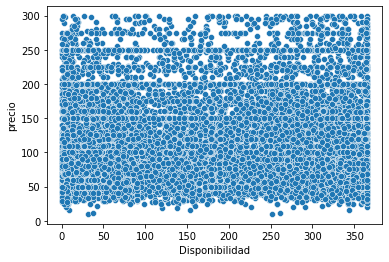

In [33]:
sns.scatterplot(data=df_5, x="Disponibilidad", y="precio")

Bueno, se intentó ... 

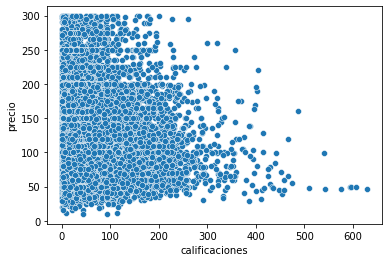

In [34]:
sns.scatterplot(data=df_5, x="calificaciones", y="precio")

Se intentó otra vez ... 

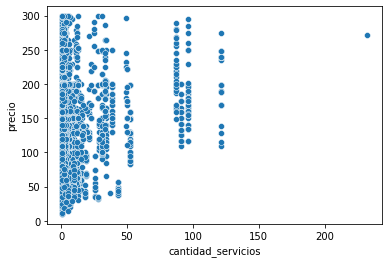

In [35]:
sns.scatterplot(data=df_5, x="cantidad_servicios", y="precio")

A medida que la cantidad de servicios aumenta, el precio tiene un incremento, sin embargo, no es tan evidente, seguiremos probando

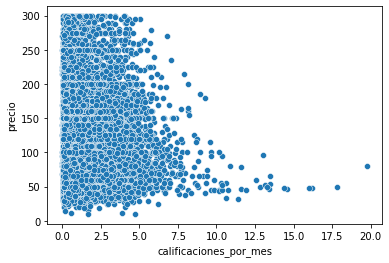

In [36]:
sns.scatterplot(data=df_5, x="calificaciones_por_mes", y="precio")

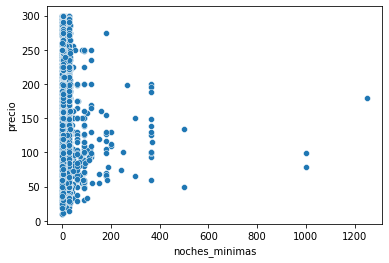

In [37]:
sns.scatterplot(data=df_5, x="noches_minimas", y="precio")

Bueno, se intentó pero tenemos aún muchos valores outliers 


1.   noches_minimas >365    (Se entiende que son alquileres con mas de un año)



In [38]:
df_6 = df_5.loc[(df_3["noches_minimas"] < 365 )]


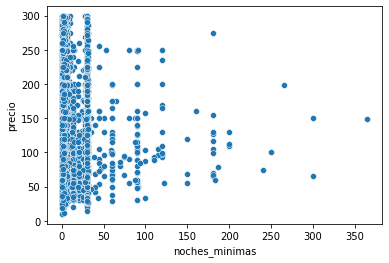

In [39]:
sns.scatterplot(data=df_6, x="noches_minimas", y="precio")

Evaluaremos las correlaciones entre variables

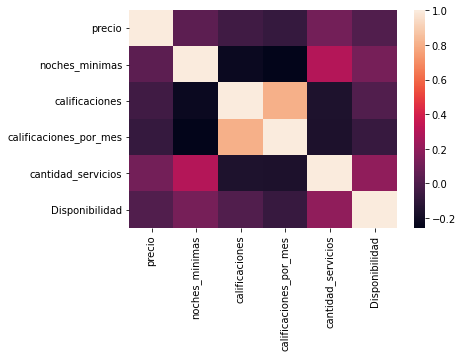

In [40]:
sns.heatmap(df_6[["precio" , "noches_minimas" ,	"calificaciones" , "calificaciones_por_mes" , "cantidad_servicios" , "Disponibilidad"]].corr());

In [41]:
import statsmodels.api as sm

y_train = df_6["precio"]
X_train = df_6[["Disponibilidad","noches_minimas","cantidad_servicios","calificaciones"]] 
X_train = sm.add_constant(X_train)

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     45.77
Date:                Sat, 07 May 2022   Prob (F-statistic):           2.94e-38
Time:                        00:21:18   Log-Likelihood:                -74796.
No. Observations:               13530   AIC:                         1.496e+05
Df Residuals:                   13525   BIC:                         1.496e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                118.1516      1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
import statsmodels.api as sm

y_train = df_6["precio"]
x_train = df_6[["cantidad_servicios"]] 
x_train = sm.add_constant(X_train)

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sat, 07 May 2022   Prob (F-statistic):           3.78e-39
Time:                        01:49:05   Log-Likelihood:                -74802.
No. Observations:               13530   AIC:                         1.496e+05
Df Residuals:                   13528   BIC:                         1.496e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                116.0293      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
df_6["dispo_365"] = (df_6["Disponibilidad"]>=365)*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_6.head()

,id,nombre,ID,host_name,distrito,barrio,servicio,precio,noches_minimas,calificaciones,calificaciones_por_mes,cantidad_servicios,Disponibilidad,Dispo,dispo_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,Private room,149.0,1.0,9.0,0.21,6.0,365.0,TRUE,1
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0,FALSE,0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0,FALSE,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0,FALSE,0
7,5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,Private room,79.0,2.0,430.0,3.47,1.0,220.0,FALSE,0


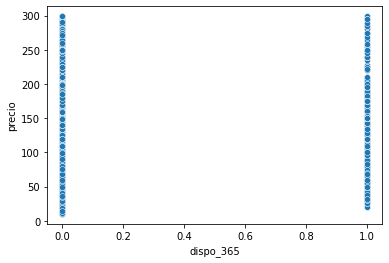

In [45]:
sns.scatterplot(data=df_6, x="dispo_365", y="precio")

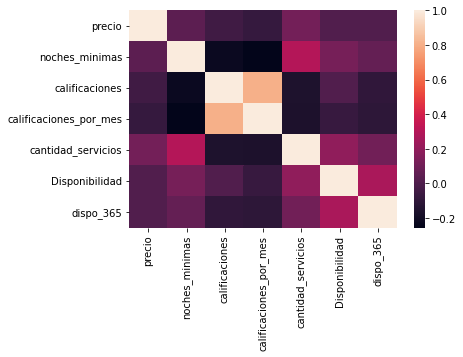

In [46]:
sns.heatmap(df_6[["precio" , "noches_minimas" ,	"calificaciones" , "calificaciones_por_mes" , "cantidad_servicios" , "Disponibilidad" , "dispo_365"]].corr());

In [47]:
y_train = df_6["precio"]
X_train = df_6[["dispo_365"]] 
X_train = sm.add_constant(X_train)

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Comprobamos que no existan datos nulos

In [48]:
df_6.isnull().sum()

id                        0
nombre                    0
ID                        0
host_name                 0
distrito                  0
barrio                    0
servicio                  0
precio                    0
noches_minimas            0
calificaciones            0
calificaciones_por_mes    0
cantidad_servicios        0
Disponibilidad            0
Dispo                     0
dispo_365                 0
dtype: int64

Vamos a intentar realizar un árbol de decisión en base a ciertas variables

En primer lugar, definiremos la matriz de confusión 

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización puede ser aplicada configurando `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Ahora se aplicará el modelo